In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from train_utils import full_report

In [2]:
df = pd.read_csv('../data/final_data_2019_only.csv')

In [3]:
df.head()

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality
0,SN18700,59.9423,10.7200,2019,5,13,12,12.47900,11.2500,11.1,0
1,SN80740,66.9035,13.6460,2019,5,13,12,4.09424,6.1500,6.0,0
2,SN61630,62.2583,8.2000,2019,5,13,12,1.81200,4.4500,4.3,0
3,SN8140,61.4255,11.0803,2019,5,13,12,8.86768,9.6500,9.5,0
4,SN23500,61.1220,9.0630,2019,5,13,12,7.61084,9.6586,8.6,0


In [4]:
print(df.shape)
df = df[df.observation_quality == 0]
print(df.shape)

(852521, 11)
(852521, 11)


In [5]:
print(df.shape)
df = df[df.lat < 72]
print(df.shape)
df = df[df.lat > 0]
print(df.shape)

(852521, 11)
(852521, 11)
(852521, 11)


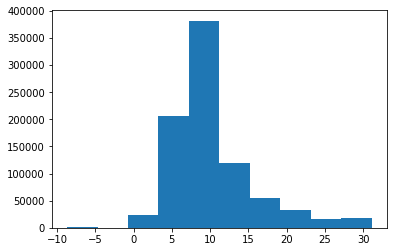

In [6]:
plt.hist(df.long);

# Formato dos Dados

In [7]:
df.describe()[['forecast', 'gridpp', 'observation']]

,forecast,gridpp,observation
count,852521.000000,852521.000000,852521.000000
mean,4.683359,5.323064,4.958439
std,10.826527,7.976094,8.008851
min,-273.000000,-39.450000,-40.000000
25%,-0.381042,0.000240,-0.300000
50%,4.585700,5.050000,4.800000
75%,10.516850,11.039250,10.700000
max,35.032230,33.850000,33.700000


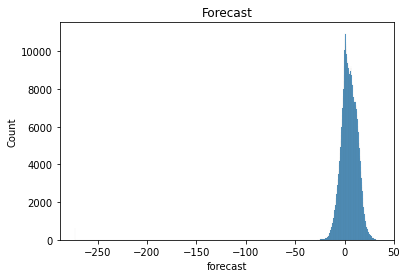

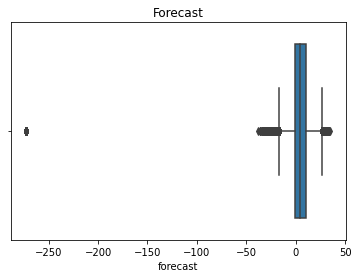

In [8]:
sns.histplot(df.forecast)
plt.title('Forecast')
plt.show()

sns.boxplot(x = df.forecast)
plt.title('Forecast')
plt.show()

In [9]:
# print(df.shape)
# df.drop(df[df.forecast > 30].index, inplace=True)
# df.drop(df[df.forecast < -20].index, inplace=True)
# print(df.shape)

In [10]:
a = list(df.forecast)
a.sort()
a[:10]

[-273.0,
 -273.0,
 -273.0,
 -273.0,
 -273.0,
 -273.0,
 -273.0,
 -273.0,
 -273.0,
 -273.0]

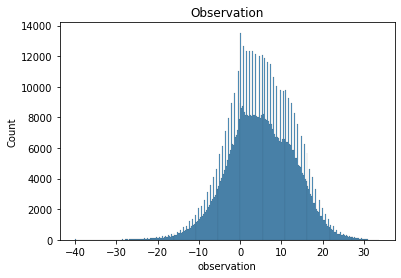

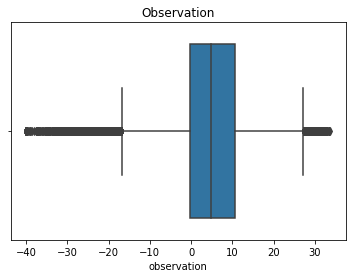

In [11]:
sns.histplot(df.observation)
plt.title('Observation')
plt.show()

sns.boxplot(x = df.observation)
plt.title('Observation')
plt.show()

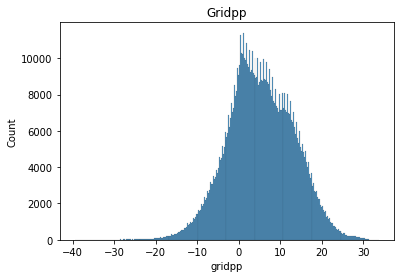

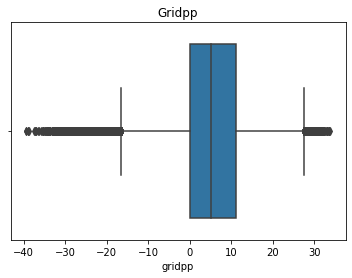

In [12]:
sns.histplot(df.gridpp)
plt.title('Gridpp')
plt.show()

sns.boxplot(x = df.gridpp)
plt.title('Gridpp')
plt.show()

In [13]:
# print(df.shape)
# df.drop(df[df.observation > 30].index, inplace=True)
# df.drop(df[df.observation < -20].index, inplace=True)
# print(df.shape)

<strong>Parece não haver problemas aqui. Talvez seja interessante posteriormente analisar as diferenças das 2 colunas, pois isso pode indicar algum erro nos dados</strong>

In [14]:
df[df.forecast < -260]

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality
358637,SN18700,59.9423,10.7200,2019,10,14,0,-273.0,6.85000,6.7,0
358638,SN80740,66.9035,13.6460,2019,10,14,0,-273.0,0.95000,0.8,0
358639,SN61630,62.2583,8.2000,2019,10,14,0,-273.0,-7.75000,-7.9,0
358640,SN78910,64.6933,12.3295,2019,10,14,0,-273.0,0.47916,1.2,0
358641,SN8140,61.4255,11.0803,2019,10,14,0,-273.0,3.25000,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...
359252,SN61580,62.2943,8.1255,2019,10,14,0,-273.0,-4.26886,-2.7,0
359253,SN24670,60.2684,9.6919,2019,10,14,0,-273.0,4.70868,4.7,0
359254,SN90490,69.6767,18.9133,2019,10,14,0,-273.0,-2.45000,-2.6,0
359255,SN77490,65.3143,13.4483,2019,10,14,0,-273.0,-2.17786,-3.2,0


In [15]:
print(df.shape)
df.drop(df[df.forecast < -260].index, inplace=True)
print(df.shape)

(852521, 11)
(851901, 11)


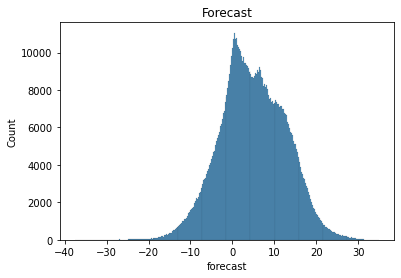

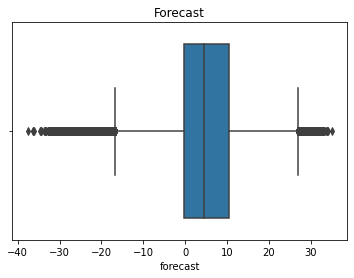

In [16]:
sns.histplot(df.forecast)
plt.title('Forecast')
plt.show()

sns.boxplot(x = df.forecast)
plt.title('Forecast')
plt.show()

### Vendo erro de medição do gridpp e cortando outliers
Definido outlier entradas com diferença entre observation e gridpp > 5

In [17]:
df['gridpp_error'] = np.sqrt((df['observation'] - df['gridpp'])**2)
df.head()

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error
0,SN18700,59.9423,10.7200,2019,5,13,12,12.47900,11.2500,11.1,0,0.1500
1,SN80740,66.9035,13.6460,2019,5,13,12,4.09424,6.1500,6.0,0,0.1500
2,SN61630,62.2583,8.2000,2019,5,13,12,1.81200,4.4500,4.3,0,0.1500
3,SN8140,61.4255,11.0803,2019,5,13,12,8.86768,9.6500,9.5,0,0.1500
4,SN23500,61.1220,9.0630,2019,5,13,12,7.61084,9.6586,8.6,0,1.0586


In [18]:
df[df.gridpp_error > 5]

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error
47,SN67153,63.3237,10.2438,2019,5,13,12,7.25050,6.60013,12.5,0,5.89987
149,SN13750,61.4183,8.8945,2019,5,13,12,-0.53857,1.07086,7.0,0,5.92914
430,SN34095,58.9817,9.6068,2019,5,13,12,12.21924,14.22920,9.1,0,5.12920
683,SN67153,63.3237,10.2438,2019,5,13,6,3.04663,5.10275,10.3,0,5.19725
1187,SN39212,58.1412,7.9397,2019,5,13,6,7.80396,7.45038,19.2,0,11.74962
...,...,...,...,...,...,...,...,...,...,...,...,...
850377,SN12590,60.9280,10.6725,2019,5,14,12,12.51270,15.90436,10.4,0,5.50436
850402,SN34095,58.9817,9.6068,2019,5,14,12,14.35254,15.52365,9.4,0,6.12365
850653,SN67153,63.3237,10.2438,2019,5,14,6,2.65894,3.22134,9.5,0,6.27866
851291,SN67153,63.3237,10.2438,2019,5,14,0,1.14820,3.52292,9.7,0,6.17708


In [19]:
df = df[df.gridpp_error < 5]

In [20]:
df.shape

(843915, 12)

## Bencmarks

Observation

In [21]:
np.sqrt(mean_squared_error(df.observation, df.forecast))

1.7558999395995927

Gridpp

In [22]:
np.sqrt(mean_squared_error(df.observation, df.gridpp))

1.1433886858167663

## *Separando Train, Test e Validation*

In [23]:
#Variáveis de tempo serão tratadas como categóricas por enquanto
df = df.astype({'month': 'object'})
df = df.astype({'year': 'object'})
df = df.astype({'day': 'object'})
df = df.astype({'hour': 'object'})

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843915 entries, 0 to 852520
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   station_id           843915 non-null  object 
 1   lat                  843915 non-null  float64
 2   long                 843915 non-null  float64
 3   year                 843915 non-null  object 
 4   month                843915 non-null  object 
 5   day                  843915 non-null  object 
 6   hour                 843915 non-null  object 
 7   forecast             843915 non-null  float64
 8   gridpp               843915 non-null  float64
 9   observation          843915 non-null  float64
 10  observation_quality  843915 non-null  int64  
 11  gridpp_error         843915 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 83.7+ MB
None


In [24]:
df.drop(['station_id','year', 'observation_quality', 'gridpp_error'], axis=1, inplace=True)

In [25]:
X = df.drop(columns=['observation'])
y = df['observation']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(675132, 7)
(168783, 7)
(675132,)
(168783,)


In [28]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, shuffle=True, random_state=42)

In [29]:
X_train.to_csv('../data/v2/X_train.csv', index = False)
X_val.to_csv('../data/v2/X_val.csv', index = False)
X_test.to_csv('../data/v2/X_test.csv', index = False)

y_train.to_csv('../data/v2/y_train.csv', index = False)
y_val.to_csv('../data/v2/y_val.csv', index = False)
y_test.to_csv('../data/v2/y_test.csv', index = False)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(675132, 7)
(84391, 7)
(84392, 7)
(675132,)
(84391,)
(84392,)


In [30]:
def prepare_data(X, y, encoder = None, scaler = None, scaler_y = None):
    cat = X.select_dtypes(include='object')
    num = X.select_dtypes('float64')

    if encoder is not None:
        cat_encoded = encoder.transform(cat)
        cat_encoded = cat_encoded.toarray()

        num_scaled = scaler.transform(num)
        y = scaler_y.transform(y.values.reshape(-1, 1))
    else:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder.fit(cat)
        cat_encoded = encoder.transform(cat)
        cat_encoded = cat_encoded.toarray()

        scaler = StandardScaler()
        scaler.fit(num)
        num_scaled = scaler.transform(num)

        scaler_y = StandardScaler()
        scaler_y.fit(np.array(y).reshape(-1, 1))
        y = scaler_y.transform(np.array(y).reshape(-1, 1))

    t = np.append(num_scaled, cat_encoded, axis = 1)

    return t, y, encoder, scaler, scaler_y


In [31]:
X_train_enc, y_train_enc, encoder, scaler, scaler_y = prepare_data(X_train, y_train)

In [32]:
X_test_enc, y_test_enc, _, _, _ = prepare_data(X_test, y_test, encoder, scaler, scaler_y)
X_val_enc, y_val_enc, _, _, _ = prepare_data(X_val, y_val, encoder, scaler, scaler_y)

In [33]:
from pickle import dump

In [35]:
dump(encoder, open('../data/v2/encoder.pkl', 'wb'))

In [36]:
dump(scaler, open('../data/v2/scaler.pkl', 'wb'))
dump(scaler_y, open('../data/v2/scaler_y.pkl', 'wb'))

# Contruindo a Rede Neural

In [34]:
from models import CNN, UsefullModel, detach_tensor_gpu
from torch import nn, optim

In [35]:
input_size = X_train_enc.shape[1]
h1, h2 = 64, 16
n_conv = 16
kernel_size = 3
model = CNN(input_size, n_conv, kernel_size, h1, h2)

In [36]:
model

CNN(
  (conv): Conv1d(1, 16, kernel_size=(3,), stride=(1,))
  (layer1): Linear(in_features=784, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
)

In [37]:
cnn = UsefullModel(model)

Device --> cuda


In [38]:
cnn.fit('runs/mestrado/v3/CNN_16C_64_16_Adam_1e3', 
        X_train = X_train_enc, 
        y_train = y_train_enc, 
        X_val = X_val_enc, 
        y_val = y_val_enc, 
        epochs = 10000,
        optim = optim.Adam, 
        loss_function = nn.MSELoss())

  0%|          | 0/10000 [00:00<?, ?it/s]

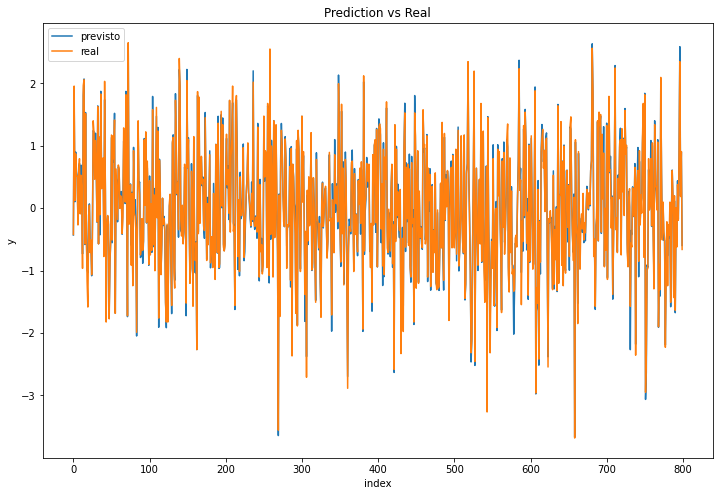

In [39]:
#Real vs. Previsto
cnn.plot_example(X_train_enc, y_train_enc, 0, 800)

In [40]:
cnn.evaluate(scaler_y, X_train_enc, y_train_enc, X_val_enc, y_val_enc, X_test_enc, y_test_enc)

Train ---> RMSE: 1.015211405384222
Validation ---> RMSE: 1.0244114833828095
Test ---> RMSE: 1.0189356371997556


In [41]:
y_pred = cnn.predict(X_train_enc)
y_pred = scaler_y.inverse_transform(y_pred)

comparacao = pd.DataFrame(y_pred, columns=['prediction'])

_y_train = y_train.reset_index(drop=True)
comparacao['label'] = _y_train

In [42]:
y_pred = cnn.predict(X_test_enc)
y_pred = scaler_y.inverse_transform(y_pred)

comparacao_test = pd.DataFrame(y_pred, columns=['prediction'])

_y_test = y_test.reset_index(drop=True)
comparacao_test['label'] = _y_test

In [43]:
comparacao_test

,prediction,label
0,15.221878,16.0
1,20.535875,21.5
2,-3.922813,-4.2
3,1.455682,4.3
4,4.182861,4.4
...,...,...
84386,-9.701574,-10.6
84387,8.418113,8.6
84388,0.788092,0.4
84389,-0.594536,-0.4


In [44]:
X_test.reset_index(drop=True, inplace=True)

In [45]:
X_test['label'] = comparacao_test['label']

In [46]:
X_test['prediction'] = comparacao_test['prediction']

In [47]:
X_test

,lat,long,month,day,hour,forecast,gridpp,label,prediction
0,59.2173,10.4103,9,18,12,15.777100,15.35254,16.0,15.221878
1,59.7310,10.2142,7,16,12,21.154300,21.37570,21.5,20.535875
2,62.2943,8.1255,1,31,0,-6.549620,-4.38705,-4.2,-3.922813
3,59.5310,10.2643,4,7,6,1.531000,1.50204,4.3,1.455682
4,61.5832,5.0278,2,20,0,4.130600,4.55000,4.4,4.182861
...,...,...,...,...,...,...,...,...,...
84386,60.8548,8.5930,1,23,0,-9.725520,-9.36844,-10.6,-9.701574
84387,69.6767,18.9133,6,4,6,10.546880,8.75000,8.6,8.418113
84388,60.5878,11.1470,10,5,18,3.680908,1.71164,0.4,0.788092
84389,60.8935,7.0557,3,26,6,-4.182740,-0.81143,-0.4,-0.594536


In [48]:
X_test.to_csv('../data/predict/prediction_cnn_to_look.csv', index=False)

### Salva modelo

In [49]:
cnn.save('../trained_models/CNN_16C_64_16_Adam_1e3.pt')

Saved as ../trained_models/CNN_16C_64_16_Adam_1e3.pt!


In [41]:
#cnn.load('teste_teste.pt')

### Análise pos-processamento

In [42]:
df.head()

,lat,long,month,day,hour,forecast,gridpp,observation
0,59.9423,10.7200,5,13,12,12.47900,11.2500,11.1
1,66.9035,13.6460,5,13,12,4.09424,6.1500,6.0
2,62.2583,8.2000,5,13,12,1.81200,4.4500,4.3
3,61.4255,11.0803,5,13,12,8.86768,9.6500,9.5
4,61.1220,9.0630,5,13,12,7.61084,9.6586,8.6


In [43]:
X.head()

,lat,long,month,day,hour,forecast,gridpp
0,59.9423,10.7200,5,13,12,12.47900,11.2500
1,66.9035,13.6460,5,13,12,4.09424,6.1500
2,62.2583,8.2000,5,13,12,1.81200,4.4500
3,61.4255,11.0803,5,13,12,8.86768,9.6500
4,61.1220,9.0630,5,13,12,7.61084,9.6586


In [44]:
teste = X.iloc[0][:]

In [55]:
type(y[0])

numpy.float64

In [46]:
teste

lat         59.9423
long          10.72
month             5
day              13
hour             12
forecast     12.479
gridpp        11.25
Name: 0, dtype: object

In [47]:
teste.to_numpy()

array([59.9423, 10.72, 5, 13, 12, 12.478999999999983, 11.25], dtype=object)

In [48]:
teste.to_list()

[59.9423, 10.72, 5, 13, 12, 12.478999999999983, 11.25]

In [49]:
pd.DataFrame(teste.to_numpy().reshape(1,-1), columns=X.columns)

,lat,long,month,day,hour,forecast,gridpp
0,59.9423,10.72,5,13,12,12.479,11.25


In [50]:
X_train

,lat,long,month,day,hour,forecast,gridpp
332553,59.1895,5.1837,10,27,6,7.396480,5.96063
171409,64.1587,12.4692,7,3,18,5.749760,5.81186
663594,61.4582,10.1872,2,7,12,-5.336120,-10.65000
178261,71.0330,27.8298,8,31,12,16.599370,13.25000
305658,60.7022,6.9373,9,7,6,3.744870,5.69266
...,...,...,...,...,...,...,...
259178,62.5082,6.0762,9,26,18,11.987550,12.59985
366458,60.8562,5.9733,10,11,0,4.137207,6.35000
131932,59.8558,10.4358,7,19,18,16.840580,18.39590
671775,65.1103,6.7912,2,4,6,3.232500,2.99136


In [51]:
d = {
    'lat': [59.9423],
    'long': [10.7200],
    'month': [5],
    'day': [13],
    'hour': [12],
    'forecast': [12.49],
    'gridpp': [11.25]
}

In [52]:
d

{'lat': [59.9423],
 'long': [10.72],
 'month': [5],
 'day': [13],
 'hour': [12],
 'forecast': [12.49],
 'gridpp': [11.25]}

In [53]:
pd.DataFrame(d)

,lat,long,month,day,hour,forecast,gridpp
0,59.9423,10.72,5,13,12,12.49,11.25


In [54]:
to_test = pd.DataFrame(d)
to_test

,lat,long,month,day,hour,forecast,gridpp
0,59.9423,10.72,5,13,12,12.49,11.25


In [60]:
def set_types(df):
    df = df.astype({'month': 'object'})
    df = df.astype({'day': 'object'})
    df = df.astype({'hour': 'object'})
    
    return df

In [61]:
to_test = set_types(to_test)
to_test.dtypes

lat         float64
long        float64
month        object
day          object
hour         object
forecast    float64
gridpp      float64
dtype: object

In [66]:
_x, _y, _, _, _ = prepare_data(to_test, pd.Series(11), encoder, scaler, scaler_y)

In [67]:
_x

array([[-0.68935078,  0.03367807,  0.97259308,  0.74305766,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ]])

In [68]:
_y

array([[0.75413472]])

In [70]:
_pred = cnn.predict(_x)

In [71]:
scaler_y.inverse_transform(_y)

array([[11.]])

In [84]:
_pred

array([[0.70605177]], dtype=float32)

In [72]:
scaler_y.inverse_transform(_pred)

array([[10.614629]], dtype=float32)

In [89]:
def unit_test(model, lat, long, month, day, hour, forecast, gridpp, encoder, scaler):
    d = {
        'lat': [lat],
        'long': [long],
        'month': [month],
        'day': [day],
        'hour': [hour],
        'forecast': [forecast],
        'gridpp': [gridpp]
    }

    df = pd.DataFrame(d)
    
    
    df = set_types(df)
    print(df)
    
    _x, _, _, _, _ = prepare_data(df, pd.Series(11), encoder, scaler, scaler_y)
    
    return model.predict(_x)

In [90]:
unit_test(cnn, 60.0, 10.0, 5, 13, 12, 12.5, 11.25, encoder, scaler)

    lat  long month day hour  forecast  gridpp
0  60.0  10.0     5  13   12      12.5   11.25


array([[0.7168124]], dtype=float32)